# Boosting Methods

In this notebook will be some additional problems regarding boosting ensemble learning methods. This material corresponds to lectures:
- `Lectures/Supervised Learning/Ensemble Learning/4. Boosting`,
- `Lectures/Supervised Learning/Ensemble Learning/5. AdaBoost`,
- `Lectures/Supervised Learning/Ensemble Learning/6. Gradient Boosting` and
- `Lectures/Supervised Learning/Ensemble Learning/7. XGBoost`.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

##### 1. AdaBoost Regression

While we presented the AdaBoost algorithm with classification in mind, it can also be implemented for regression problems. For the theoretical details check out these two papers:

- A Decision-Theoretic Generalization of On-Line Learning and an Application to Boosting, Freund and Schapire (1996), <a href="https://www.sciencedirect.com/science/article/pii/S002200009791504X">https://www.sciencedirect.com/science/article/pii/S002200009791504X</a>.
- Improving  Regressors  using  Boosting  Techniques, Drucker (1997), <a href="https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.21.5683&rep=rep1&type=pdf">https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.21.5683&rep=rep1&type=pdf</a>.

In `sklearn` an AdaBoost regression algorithm can be implemented with `AdaBoostRegressor`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html</a>.

Using a validation set approach, find the best value for `n_estimators` from $1$ to $40$ for an AdaBoost regressor with a decision tree with `max_depth=2` on the following data.

In [2]:
baseball = pd.read_csv("../../../Data/baseball_run_diff.csv")

## make a train test split
from sklearn.model_selection import train_test_split

baseball_train, baseball_test = train_test_split(baseball.copy(), 
                                                    shuffle=True,
                                                    random_state=314,
                                                    test_size=.2)

## make a validation set
baseball_train_train, baseball_val = train_test_split(baseball_train.copy(), 
                                                        shuffle=True,
                                                        random_state=13241,
                                                        test_size=.2)

In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

## import mse
from sklearn.metrics import mean_squared_error

In [6]:
n_trees = range(1,41)
val_mses = []

for n_tree in n_trees:
    ab = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=n_tree, random_state=440)

    ## fit the booster
    ab.fit(baseball_train_train[['RD']], baseball_train_train['W'])
    
    val_mses.append(mean_squared_error(baseball_val.W, ab.predict(baseball_val[['RD']])))

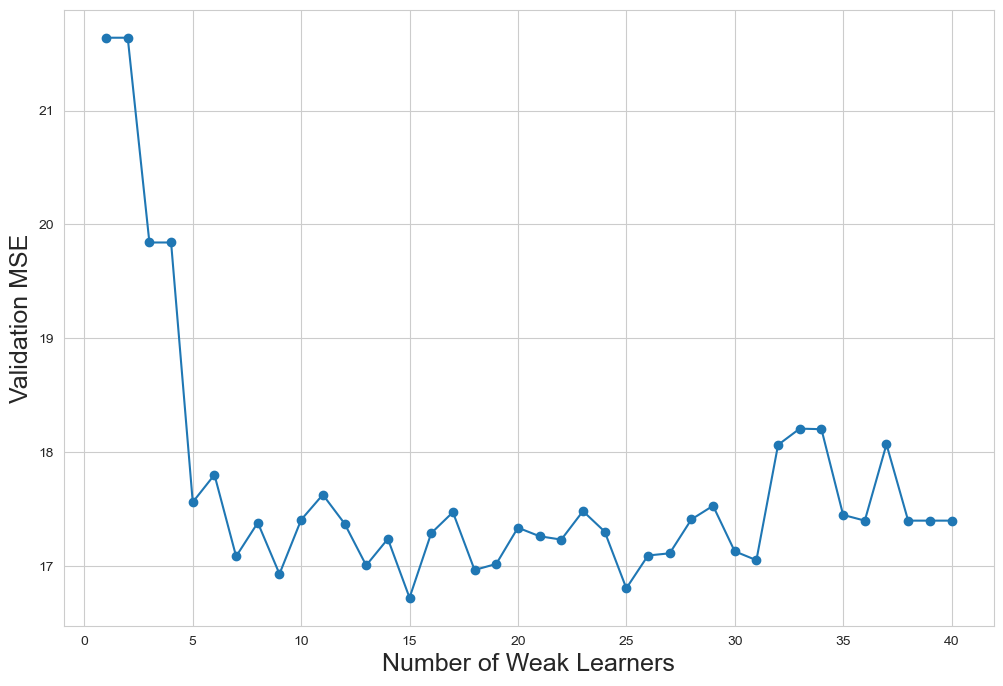

In [7]:
plt.figure(figsize=(12,8))

plt.plot(n_trees, val_mses, '-o')

plt.xlabel("Number of Weak Learners", fontsize=18)
plt.ylabel("Validation MSE", fontsize=18)

plt.show()

Let's go with 15.

##### 2. Gradient Boosting Classifier

While we implemented gradient boosting for regression, it can also be used for classification problems.

For the theoretical formulation check out these papers

- Greedy function approximation: A gradient boosting machine, Friedman (2001), <a href="https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full">https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full</a>.
- The Elements of Statistical Learning, <a href="https://web.stanford.edu/~hastie/ElemStatLearn/">https://web.stanford.edu/~hastie/ElemStatLearn/</a>

In `sklearn` a gradient boosting classification model can be implemented with `GradientBoostingClassifier`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html</a>.

Use a validation set to find the value of `n_estimators` that gives the best TPR and the `n_estimators` that gives the best FPR.

In [8]:
from sklearn.datasets import load_breast_cancer

In [9]:
## Loads the data from sklearn 
cancer = load_breast_cancer(as_frame=True)

## the 'data' entry contains the features
X = cancer['data']

## the 'target' entry contains what we would like to predict
y = cancer['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=354,
                                                       test_size=.2,
                                                       stratify=y)

X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train,
                                                               shuffle=True,
                                                               random_state=35433,
                                                               test_size=.2,
                                                               stratify=y_train)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [12]:
n_trees = range(1,101)
val_tprs = []
val_fprs = []

for n_tree in n_trees:
    gb = GradientBoostingClassifier(n_estimators=n_tree, random_state=413)
    gb.fit(X_train_train, y_train_train)
    conf_mat = confusion_matrix(y_val, gb.predict(X_val))
    val_tprs.append(conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1]))
    val_fprs.append(conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1]))

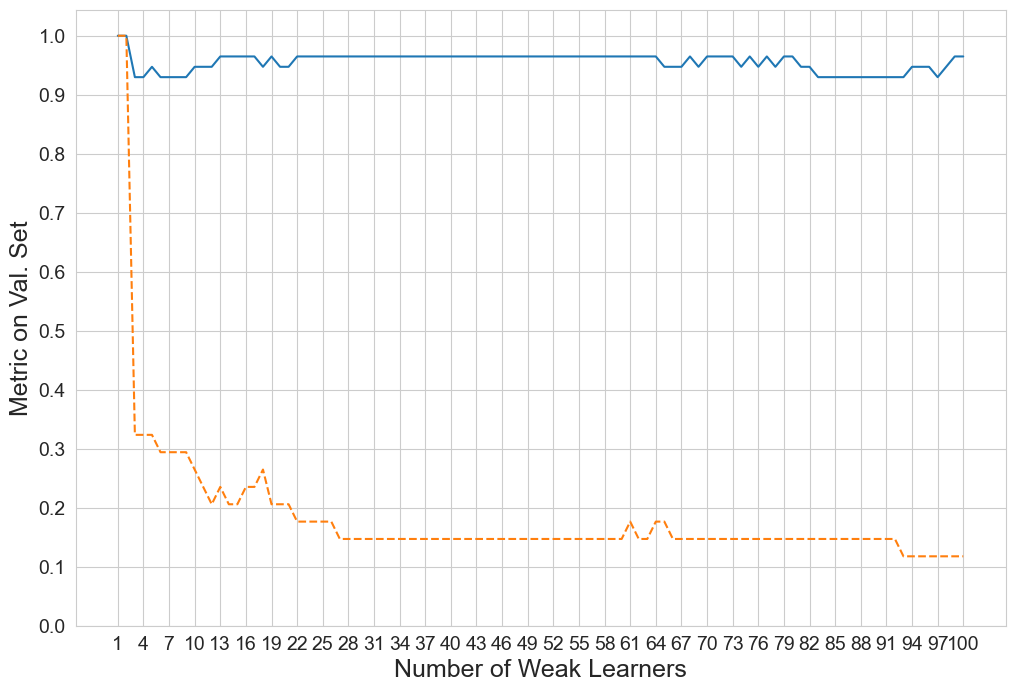

In [13]:
plt.figure(figsize=(12,8))

plt.plot(n_trees, val_tprs, '-', label="TPR")
plt.plot(n_trees, val_fprs, '--', label="FPR")


plt.xlabel("Number of Weak Learners", fontsize=18)
plt.ylabel("Metric on Val. Set", fontsize=18)

plt.xticks(range(1,101,3), fontsize=14)
plt.yticks(np.arange(0,1.1,.1), fontsize=14)

plt.show()

##### 3. Classification in `XGBoost`

You can build a gradient boosting classifier in `XGBoost` with `XGBClassifier`, <a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier">https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier</a>. rewrite your code for 2. above, using `XGBClassifier` rather than `GradientBoostingClassifier`.

In [12]:
from xgboost import XGBClassifier

In [13]:
n_trees = range(1,101)
val_tprs = []
val_fprs = []


for n_tree in n_trees:
    xgb = XGBClassifier(n_estimators=n_tree, 
                        random_state=413, 
                        use_label_encoder=False,
                        eval_metric='logloss')
    xgb.fit(X_train_train, y_train_train)
    
    conf_mat = confusion_matrix(y_val, xgb.predict(X_val))

    val_tprs.append(conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1]))
    val_fprs.append(conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1]))

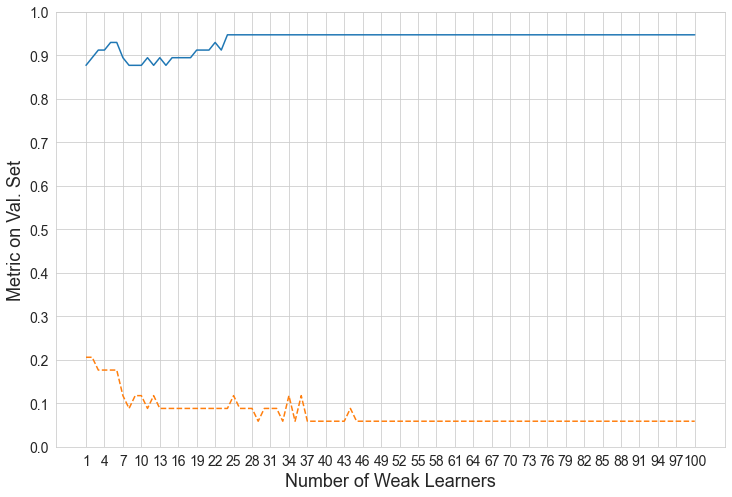

In [14]:
plt.figure(figsize=(12,8))

plt.plot(n_trees, val_tprs, '-', label="TPR")
plt.plot(n_trees, val_fprs, '--', label="FPR")


plt.xlabel("Number of Weak Learners", fontsize=18)
plt.ylabel("Metric on Val. Set", fontsize=18)

plt.xticks(range(1,101,3), fontsize=14)
plt.yticks(np.arange(0,1.1,.1), fontsize=14)

plt.show()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)